# **PANDAS (III)**

In [31]:
# Importa las librerías necesarias que conoces
# Rutina Mañanera de librerias necesarias y que quiza necesitare
import random as rd
import string as st
import pandas as pd
import numpy as np

## .loc || .iloc

df.loc[etiqueta, columna] <- selección por etiquetas

df.iloc[índice, columna] <- selección por índice

La elección peude ser tanto por etiqueta como por índice. En caso de introducir más de una etiqueta, índice y/o columna se hará a partir de una lista:

df.loc[[etiqueta1, etiqueta2], [col1, col2]]

df.iloc[[índice1, índice2], [col1, col2]]

In [2]:
# Importar la funcion de NumPy para crear arreglos de numeros enteros
from numpy.random import randn
np.random.seed(101) # Inicializar el generador aleatorio

In [ ]:
# Crear un dataframe con numeros aleatorios de 4 Columnas y 5 Filas
df = pd.DataFrame(randn(5,4),
                  index='A B C D E'.split(),
                  columns='W X Y Z'.split())

### **1.** Selecciona todos los valores de la fila 'A'.

In [ ]:
df.loc['A']

,A
W,2.706850
X,0.628133
Y,0.907969
Z,0.503826


### **2.** Selecciona todos los valores de la fila 'B' utilizando su índice.

In [ ]:
df.iloc[1]

,B
W,0.651118
X,-0.319318
Y,-0.848077
Z,0.605965


### **3.** Selecciona todos los valores de las filas 'B' y 'C' pertenecientes a las columnas 'W' y 'X'.

In [ ]:
df.loc[['B','C'],['W','X']]

,W,X
B,0.651118,-0.319318
C,-2.018168,0.740122


### **4.** Selecciona los valores de la tercera y cuarta fila de la columna 'Y'.

In [ ]:
df

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,-0.319318,-0.848077,0.605965
C,-2.018168,0.740122,0.528813,-0.589001
D,0.188695,-0.758872,-0.933237,0.955057
E,0.190794,1.978757,2.605967,0.683509


In [ ]:
df.iloc[[2,3],1]

,X
C,0.740122
D,-0.758872


## Agregaciones
Al igual que vimos en SQL hay varias operaciones agregadas que requerirán agrupar nuestros datos. Supongamos que tenemos datos sobre precios de viviendas distribuidas por barrios y queremos saber cuál es la media del precio de venta de cada barrio. Primero deberemos agrupar los datos del DataFrame por barrios y luego sobre esa agrupación aplicar el cálculo de la media.

GROUP BY

`DataFrame.groupby(col)` <- de este modo agruparemos por la variable que hay en esa columna. Podemos agrupar por varias columnas, por ejemplo, queremos ver la media de los precios por barrio para cada año.

El group by es un tipo de objeto, como tal puede almacenarse en una variable.

In [3]:
data = {'Company':['GOOG','GOOG','MSFT','MSFT','FB','FB','GOOG','MSFT','FB'],
       'Person':['Sam','Charlie','Amy','Vanessa','Carl','Sarah','John','Randy','David'],
       'Sales':[200,120,340,124,243,350,275,400,180]}

df = pd.DataFrame(data)
df

,Company,Person,Sales
0,GOOG,Sam,200
1,GOOG,Charlie,120
2,MSFT,Amy,340
3,MSFT,Vanessa,124
4,FB,Carl,243
5,FB,Sarah,350
6,GOOG,John,275
7,MSFT,Randy,400
8,FB,David,180


### **5.** Muestra un array con los valores únicos de la columna 'Company'.

In [ ]:
df.Company.unique()

array(['GOOG', 'MSFT', 'FB'], dtype=object)

### **6.** Agrupa los datos de la columna 'Company' para poder hacer operaciones agregadas.

In [ ]:
df_compañia = df.groupby('Company')
df_compañia

### **7.** ¿Qué tipo de dato tiene esta variable?

In [ ]:
type(df_compañia)
# Parece ser que es un objeto de pandas de tipo groupby

pandas.core.groupby.generic.DataFrameGroupBy

### **8.** ¿Cuál es la media de ventas de cada empresa?

In [ ]:
df_compañia.agg({'Sales':'mean'})

,Sales
Company,
FB,257.666667
GOOG,198.333333
MSFT,288.000000


### **9.** ¿Puedes calcular la misma media sin usar el groupby almacenado en una variable?

In [ ]:
# Y sin un sar el .agg
df.groupby('Company')[['Sales']].mean()

,Sales
Company,
FB,257.666667
GOOG,198.333333
MSFT,288.000000


### **10.** Qué cliente ha gastado más en cada tienda.

In [15]:
df_ventas_persona = df.groupby(['Company','Person'])[['Sales']].max()
df_ventas_persona
# way, pero me esta mostrando todos los clientes, y no se como acceder a que
# solo se vea el max en el subgrupo de Sales. Seguro que luego Victor me enseña
# que es algo muy simple, pero no tengo manera de sacarlo por mas que pruebo

Sales
Company Person        
FB      Carl       243
        David      180
        Sarah      350
GOOG    Charlie    120
        John       275
        Sam        200
MSFT    Amy        340
        Randy      400
        Vanessa    124

In [107]:
pd.__version__
# vale he encontrado idxmax y funciona en la version que tenemos,
# pero no se si hace lo que quiero

'2.1.4'

In [ ]:
help(pd.DataFrame.idxmax)
# No creo, ademas no termino de entenderla, lo vamos a dejar por ahora.

In [9]:
# Lo que si necesito, es un grupo de registros concretos, y ya que con el max
# no consigo los True en las lineas que necesito...quiza con un merge(?)
# se pueden mergear series y dataframes(?)
df_ventas = df.groupby('Company')[['Sales']].max()
df_ventas

,Sales
Company,
FB,350
GOOG,275
MSFT,400


In [ ]:
# vale, asi he sacado los maximos que necesito. Quiza esto cotejandolo con el
# otro dataframe.
df_ventas_persona[df_ventas_persona == df_ventas]
# vale, me da un error de que no tiene los mismos indices. ¿Y si los igualo de
# alguna manera? ¿Quiza cambiandoselos?

ValueError: Can only compare identically-labeled (both index and columns) DataFrame objects

In [ ]:
df_ventas_persona.set_index('Company')
# vale, Company no esta en las columnas, asi que es indice del groupby este
# a ver si me deja resetearlo

KeyError: "None of ['Company'] are in the columns"

In [13]:
df_ventas_persona.reset_index(inplace = True)
# me ha dejado resetearlo, y ahora a volver Company sola Index
df_ventas_persona.set_index('Company', inplace = True)
df_ventas_persona

,Person,Sales
Company,,
FB,Carl,243
FB,David,180
FB,Sarah,350
GOOG,Charlie,120
GOOG,John,275
GOOG,Sam,200
MSFT,Amy,340
MSFT,Randy,400
MSFT,Vanessa,124


In [16]:
# Way, ya la tengo como indice, vamos a probar ahora
df_ventas_persona[df_ventas_persona.Sales == df_ventas['Sales']]

ValueError: Can only compare identically-labeled Series objects

In [20]:
# intentarlo con Merge on Sales reseteandole los indices(?)
df_ventas.reset_index(inplace=True)

df_ventas_persona = df_ventas.merge(df,on=['Company','Sales'])

df_ventas_persona[['Company','Person','Sales']]

# Asi si. Quiza ayer estaba espeso o algo. Pero creo que entendi bien que el
# principal problema que tenia era que no habia manera de conseguir unir las
# dos tablas(DataFrames/Series) ya que los indices o columnas por las que las
# unia no daban un resultado coherente para pandas

,Company,Person,Sales
0,FB,Sarah,350
1,GOOG,John,275
2,MSFT,Randy,400


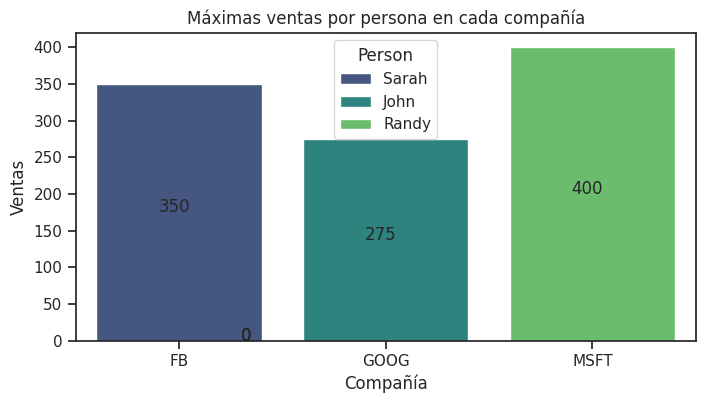

In [67]:
# Y si...?
import seaborn as sns

sns.set_context("paper")
sns.set(rc={"figure.figsize": (8.,4.)}) #Tamaño de las figuras, ancho y alto
sns.set_style("ticks") #darkgrid, whitegrid, dark, white, ticks
sns.set_palette("deep") # deep, muted, pastel, bright, dark, colorblind


ax = sns.barplot(df_ventas_persona,
                 x='Company',
                 y='Sales',
                 hue='Person',
                 palette='viridis',
                 )

# Buscando como cambiar las etiquetas, me he dado cuenta que en matplotlib
# puedes modificarlas directamente mientras haces el .plot. Pero con seaborn
# tienes que añadirlas al Axes(ax) que luego usas para pintar el grafico
ax.set_title('Máximas ventas por persona en cada compañía')
ax.set_xlabel('Compañía')
ax.set_ylabel('Ventas')

for p in ax.patches:
    ax.annotate(int(p.get_height()),
                (p.get_x()+0.3,
                 p.get_height()/2))

# Mira, ¡Hasta me sale el 0 en el eje x a mi!

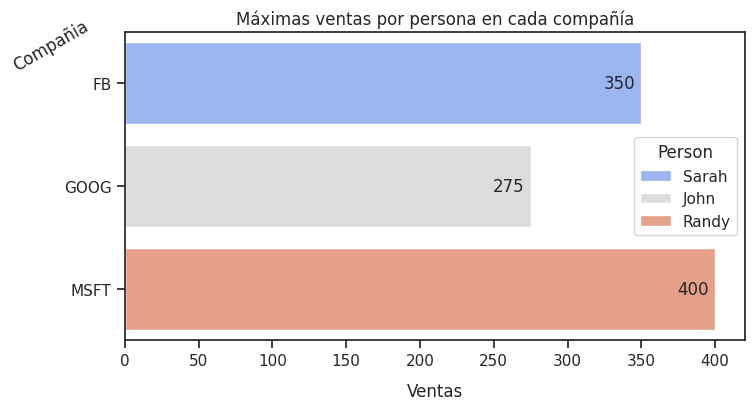

In [100]:
# Voy a rotarlo y a modificarlo un poco para que se vea mas bonito
ax = sns.barplot(df_ventas_persona,
                 x='Sales',
                 y='Company',
                 hue='Person',
                 palette='coolwarm',
                 )

ax.set_title('Máximas ventas por persona en cada compañía')
# Esta tambien esta way, pero resulta que rotation no aparece en help pero si
# en la documentacion y despues de toquetear se pueden usar valores negativos
# para ajustar lo cerca que quieres la etiqueta
# En este caso he rotado, separado y puesto en top la etiqueta de compañia
# para que se vea algo mejor. Tambien le he aplicado separacion a la de ventas
# para que no estuviera tan pegada a los valores del eje x
ax.set_ylabel('Compañia', rotation=30, labelpad=-20, loc='top')
ax.set_xlabel('Ventas', labelpad=10)

for p in ax.patches:
    ax.annotate(int(p.get_width()),
                (p.get_width() - 15,
                 p.get_y() + p.get_height() / 2),
                 ha='center',
                 va='center')

### **11.** Qué cliente ha gastado menos.

In [44]:
# Jojo, ahora si que voy a sacarlo a la primera
df_ventas_min = df.groupby('Company')['Sales'].min().reset_index()

df_ventas_min_persona = df_ventas_min.merge(df,on=['Company','Sales'])

df_ventas_min_persona[['Company','Person','Sales']]

,Company,Person,Sales
0,FB,David,180
1,GOOG,Charlie,120
2,MSFT,Vanessa,124


In [43]:
# Vale, como me ha tenido tan mosca, me he leido toda la documentacion de
# groupby que he encontrado y he sacado que hay una manera de agrupar
# sin añadir las keys usando .apply(lambda x:x)

df.groupby(['Company','Sales'], group_keys=False).apply(lambda x: x)

# Hmm, no, esto ya lo habia sacado yo con un reset index tambien

,Company,Person,Sales
0,GOOG,Sam,200
1,GOOG,Charlie,120
2,MSFT,Amy,340
3,MSFT,Vanessa,124
4,FB,Carl,243
5,FB,Sarah,350
6,GOOG,John,275
7,MSFT,Randy,400
8,FB,David,180


### **12.** Cuántos clientes han comprado.

In [124]:
# Creo que es hacer un count de los que hayan hecho algo de Sales, supongo
# yo por lo pronto lo pongo bonito
print(f"Los clientes que han comprado algo han sido: {df[df['Sales'] > 0].Person.count()}")
print(f"Y el nombre de los mismos son: {', '.join(df[df['Sales'] > 0].Person.unique().tolist())}")

Los clientes que han comprado algo han sido: 9
Y el nombre de los mismos son: Sam, Charlie, Amy, Vanessa, Carl, Sarah, John, Randy, David


## **DATOS NaN (II)**
Podemos sustituir datos NaN para poder operar con ellos. Para ello hay varias funciones disponibles que sirven para eliminar, sustituir esos valores por lo que queramos en base a un criterio que nosostros mismos queramos. Dependerá del criterio y la creatividad de cada uno de nosotros.

In [139]:
df = pd.DataFrame({'A':[1,2,np.nan],
                  'B':[5,np.nan,np.nan],
                  'C':[1,2,3]})
df

,A,B,C
0,1.0,5.0,1
1,2.0,NaN,2
2,NaN,NaN,3


### **13.** Elimina las filas que tengan datos faltantes.

In [128]:
# El axis nos lo podemos ahorrar ya que el por defecto es 0, pero lo he puesto
# para practicar y que no se me olvide. Como veo que hay que eliminar mas
# columnas y demas no voy a poner los inplace
df.dropna(axis=0)

,A,B,C
0,1.0,5.0,1


### **14.** Elimina las columnas que tengan datos faltantes.

In [129]:
df.dropna(axis=1)

,C
0,1
1,2
2,3


### **15.** Elimina las filas que tengan 2 NaN.

In [134]:
# El thresh es un poco complejo, ya que lo que elimina no es por la cantidad de
# NaNs, si no por la cantidad de elementos no NaNs que contenga. Por ejemplo,
# si nuestro thresh fuera 1, no eliminariamos ninguna fila. Ya que como minimo
# tenemos un registro no NaN en cada fila
df.dropna(thresh=2)

,A,B,C
0,1.0,5.0,1
1,2.0,NaN,2


### **16.** Rellena el dato faltante en la columna 'A' con la media de los datos de la misma columna.

In [140]:
# En este hay un copy() porque hice pruebas para asegurarme que solo rellenaba
# esa columna
df_backup = df.copy()
df_backup.A = df.A.fillna(df.A.mean())
df_backup

,A,B,C
0,1.0,5.0,1
1,2.0,NaN,2
2,1.5,NaN,3


### **17.** Recupera el DataFrame original (encima del ejercicio 13) y rellena todos los NaN con el tipo de dato que quieras.

In [144]:
# Pues mira, ya que me ha gustado la media, vamos a seguir rellenandola, pero
# complicandonos la vida en la segunda vuelta.

# La primera igual, la media de la columna.
df.A.fillna(df.A.mean(),inplace = True)

# Ahora rellenamos las filas 1 y 2 con la media de todos los valores en la misma
# fila
for i in range(df.shape[0]):
    df.iloc[i] = df.iloc[i].fillna(df.iloc[i].mean())
    # Menos mal que me hace la media aun cuando hay NaNs.
    # Creia que me iba a fallar o darme quebraderos de cabeza ahi

df

,A,B,C
0,1.0,5.00,1
1,2.0,2.00,2
2,1.5,2.25,3


### Carga el siguiente dataset y trabaja con él en los siguientes ejercicios:

In [1]:
import seaborn as sns
df = sns.load_dataset('titanic')

### **18.** Mira la información del DataFrame.

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


### **19.** Muestra las filas entre la 25 y la 30 (ambas incluidas).

In [3]:
# Inverso por dar por saco y no olvidarme como funcionaban los range
df.iloc[30:24:-1]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
30,0,1,male,40.0,0,0,27.7208,C,First,man,True,NaN,Cherbourg,no,True
29,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
28,1,3,female,NaN,0,0,7.8792,Q,Third,woman,False,NaN,Queenstown,yes,True
27,0,1,male,19.0,3,2,263.0000,S,First,man,True,C,Southampton,no,False
26,0,3,male,NaN,0,0,7.2250,C,Third,man,True,NaN,Cherbourg,no,True
25,1,3,female,38.0,1,5,31.3875,S,Third,woman,False,NaN,Southampton,yes,False


### **20.** Saca una lista de todas las columnas.

In [4]:
df.columns.tolist()

['survived',
 'pclass',
 'sex',
 'age',
 'sibsp',
 'parch',
 'fare',
 'embarked',
 'class',
 'who',
 'adult_male',
 'deck',
 'embark_town',
 'alive',
 'alone']

### **21.** Mira los valores únicos de cada columna e indica cuántos hay.

In [5]:
import textwrap
# Juer, esta es larga, en mas de un sentido
# Voy a usar textwrap para que la salida de texto por pantalla de los valores
# no se vayan a narnia

for col in df.columns:
    print(f"La columna: {col} \nTiene: {df[col].nunique()} valores unicos.")
    # vale, aqui no me dejaba hacer el join, y creo que es por los nans, asi que
    # le voy a dar un fillna en mitad del chorizo para que quede aun mas apretado
    chorizo = textwrap.fill(', '.join(df[col].astype(str).unique().tolist()), width=50)
    # El astype esta ahi porque los datos categoricos no les gusta hacer cosas
    # con nans, listas y cadenas.
    print(f"Que son: {chorizo}\n")


La columna: survived 
Tiene: 2 valores unicos.
Que son: 0, 1

La columna: pclass 
Tiene: 3 valores unicos.
Que son: 3, 1, 2

La columna: sex 
Tiene: 2 valores unicos.
Que son: male, female

La columna: age 
Tiene: 88 valores unicos.
Que son: 22.0, 38.0, 26.0, 35.0, nan, 54.0, 2.0, 27.0,
14.0, 4.0, 58.0, 20.0, 39.0, 55.0, 31.0, 34.0,
15.0, 28.0, 8.0, 19.0, 40.0, 66.0, 42.0, 21.0,
18.0, 3.0, 7.0, 49.0, 29.0, 65.0, 28.5, 5.0, 11.0,
45.0, 17.0, 32.0, 16.0, 25.0, 0.83, 30.0, 33.0,
23.0, 24.0, 46.0, 59.0, 71.0, 37.0, 47.0, 14.5,
70.5, 32.5, 12.0, 9.0, 36.5, 51.0, 55.5, 40.5,
44.0, 1.0, 61.0, 56.0, 50.0, 36.0, 45.5, 20.5,
62.0, 41.0, 52.0, 63.0, 23.5, 0.92, 43.0, 60.0,
10.0, 64.0, 13.0, 48.0, 0.75, 53.0, 57.0, 80.0,
70.0, 24.5, 6.0, 0.67, 30.5, 0.42, 34.5, 74.0

La columna: sibsp 
Tiene: 7 valores unicos.
Que son: 1, 0, 3, 4, 2, 5, 8

La columna: parch 
Tiene: 7 valores unicos.
Que son: 0, 1, 2, 5, 3, 4, 6

La columna: fare 
Tiene: 248 valores unicos.
Que son: 7.25, 71.2833, 7.925, 53.1, 8.05

### **22.** ¿Hay alguna columna que contenga la misma información?

###### Haz la comprobación en caso afirmativo. El output debe ser simplemente True o False.

In [16]:
# Hay alguna columna que contenga la misma informacion y devolvamos solo true o false
# esto no lo entiendo exactamente. ¿Supongo que es comprobar si hay columnas duplicadas?
# o quiza se refiera a que la columna who es similar a sex, pero no igual.
# Who contiene child, que desconocemos si es femenino o masculino.
# Vale, aunque survived, pclass y embarked si son las mismas que alive, class y
# embark_town respectivamente. Vamos a sacar un dicc de survived con alive,
# pclass y embarked, con alive, class y embark_town que devuelva true o false
# si coinciden.

alive_map = {'yes':1,'no':0}

class_map = {'First':1,'Second':2,'Third':3}

embark_town_map = {'Southampton':1,'Cherbourg':2,'Queenstown':3}


# Ahora vamos a comprobar las equivalencias
print(f"La columna 'survived' equivale a la columna 'alive': {all(df['survived'] == df['alive'].map(alive_map))}")
print(f"La columna 'pclass' equivale a la columna 'class': {all(df['pclass'] == df['class'].map(class_map))}")
print(f"La columna 'embark_town' equivale a la columna 'embarked': {all(df['embark_town'] == df['embarked'].map(embark_town_map))}")
# Uh, embark_town y embarked no son iguales, quiza por los nan? los voy a rellenar con 'NaN' a ver si asi si
print(f"La columna 'embark_town' equivale a la columna 'embarked': {all(df['embark_town'].fillna('NaN') == df['embarked'].fillna('NaN').map(embark_town_map))}")
# Pues no, esta columna tampoco es igual

La columna 'survived' equivale a la columna 'alive': True
La columna 'pclass' equivale a la columna 'class': True
La columna 'embark_town' equivale a la columna 'embarked': False
La columna 'embark_town' equivale a la columna 'embarked': False


#### **22.2** En caso de True elimina la columna repetida (cuya información sea una string)

In [17]:
# Pues nos cargamos las dos que tienen strings y confirmadas repetidas
df.drop('alive',axis=1,inplace=True)
df.drop('class',axis=1,inplace=True)

### **23.** Revisa la columna 'age'. ¿Encuentras alguna anomalía?

In [21]:
df.age.info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: age
Non-Null Count  Dtype  
--------------  -----  
714 non-null    float64
dtypes: float64(1)
memory usage: 7.1 KB


In [20]:
df.age.head(5), df.age.tail(5)

(0    22.0
 1    38.0
 2    26.0
 3    35.0
 4    35.0
 Name: age, dtype: float64,
 886    27.0
 887    19.0
 888     NaN
 889    26.0
 890    32.0
 Name: age, dtype: float64)

In [19]:
df.age.describe()

,age
count,714.000000
mean,29.699118
std,14.526497
min,0.420000
25%,20.125000
50%,28.000000
75%,38.000000
max,80.000000


In [22]:
df.age.isna().sum()

177

In [ ]:
# genial, tenemos edades .float y un puñaico(177) de nans

### **24.** Corrige las anomalías encontradas, no tengas en cuenta por ahora nos NaN.

In [40]:
# Pues cambiamos age a int dejando los nans

df.age = df.age.astype(int, errors='ignore')
df.age.info(), df.age.head(2)

# No lo hace, ni con el errors='ignore'

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: age
Non-Null Count  Dtype  
--------------  -----  
714 non-null    float64
dtypes: float64(1)
memory usage: 7.1 KB


(None,
 0    22.0
 1    38.0
 Name: age, dtype: float64)

In [44]:
# Pues nada, le quito los nans y luego se los devuelvo...yoquese
df.age = df.age.fillna(-1).astype(int).replace(-1, np.nan) # No hace nada

# Pues tiene que ser con el int de pandas o numpy, si no, no me deja
df.age = df.age.fillna(-1).astype(pd.Int64Dtype()).replace(-1, np.nan)
df.age.info(), df.age.head(2)

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: age
Non-Null Count  Dtype
--------------  -----
714 non-null    Int64
dtypes: Int64(1)
memory usage: 8.0 KB


(None,
 0    22
 1    38
 Name: age, dtype: Int64)

### **25.** Excluye las edades superiores a 66 e inferiores a 00.

In [47]:
# Ehh, vale, pero segun el describe, la minima no bajaba de 0,42
df = df[(df.age <= 66) & (df.age >= 0)]
df.age.describe()

,age
count,707.0
mean,29.257426
std,13.968254
min,0.0
25%,20.0
50%,28.0
75%,38.0
max,66.0


In [48]:
import numpy as np

<Axes: xlabel='age'>

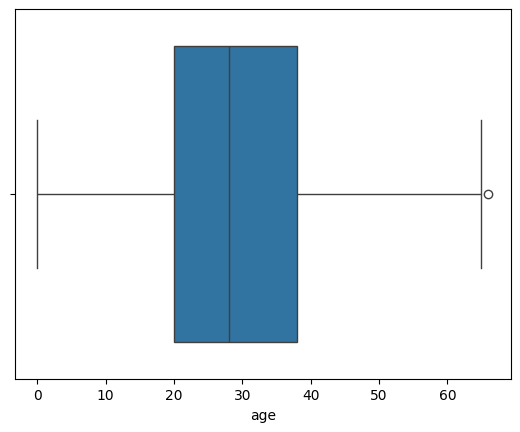

In [49]:
# @title
sns.boxplot(data = df, x = 'age')

In [50]:
# @title
#df.age.replace(to_replace=[0.83, 0.92, 0.75, 0.67, 0.42, 0.83], value = [83, 92, 75, 67, 42, 83], inplace = True)

In [51]:
# @title
age = df.dropna(subset = ['age'])

q1 = np.percentile(age.age, 25)
q3 = np.percentile(age.age, 75)

iqr = q3 - q1

lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

print((lower, upper))

(-7.0, 65.0)


### **26.** Calcula la media de los datos con los datos resultantes del ejercicio anterior.

In [52]:
df.age.mean()

29.257425742574256

### **27.** Sustituye los valores NaN con el resultado del ejercicio anterior.

In [58]:
df.age = df.age.fillna(df.age.mean())
df.age.info()

<class 'pandas.core.series.Series'>
Index: 707 entries, 0 to 890
Series name: age
Non-Null Count  Dtype
--------------  -----
707 non-null    Int64
dtypes: Int64(1)
memory usage: 11.7 KB


### **28.** Cambia los datos de la columna 'age' a integer.

In [61]:
# eso ya lo hice cuando corregi la anomalia
df.age.dtype

Int64Dtype()

### **29.** ¿Cuántos hombres y cuántas mujeres viajaban en cada clase?

In [80]:
# Es un poco laborioso, pero vamos a renombrar las columnas que se muestran
viajeros = df.groupby(['sex','pclass'])[['sex']].count()
viajeros = viajeros.rename(columns={'sex': 'viajeros'})
viajeros

viajeros
sex    pclass          
female 1             85
       2             74
       3            102
male   1             97
       2             98
       3            251

### **30.** ¿Cuántos hombres y cuántas mujeres murieron en cada clase?

In [76]:
muertes = df[df.survived == 0].groupby(['sex','pclass'])[['survived']].count()
muertes = muertes.rename(columns={'survived': 'muertes'})
muertes

muertes
sex    pclass         
female 1             3
       2             6
       3            55
male   1            58
       2            83
       3           213

### **31.** ¿Cuántos hombres y cuántas mujeres embarcaron en Southampton?

In [79]:
embarcados = df[df.embark_town == 'Southampton'].groupby(['sex','embark_town'])[['sex']].count()
embarcados = embarcados.rename(columns={'sex': 'embarcados'})
embarcados

,,embarcados
sex,embark_town,
female,Southampton,186
male,Southampton,364


### **32.** Con el resultado anterior, y teniendo en cuenta EL TOTAL de pasajeros registrados en los datos, indica el mismo resultado en porcentaje.

In [83]:
porcentaje = ((embarcados.embarcados / df.shape[0]) * 100).round(2)
porcentaje

,,embarcados
sex,embark_town,
female,Southampton,26.31
male,Southampton,51.49
